# Regression Predictive Analysis : Plane Price Prediction

### Import Library

Pada tahap ini, diimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import os
import numpy as np
import kagglehub
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Data Loading

Memuat dataset plane price prediction dari Kaggle menggunakan kagglehub

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Download latest version
path = kagglehub.dataset_download("rafsunahmad/plane-price-prediction")
print("Path ke file yang diunduh:", path)

print("Path to dataset files:", path)

Path ke file yang diunduh: /kaggle/input/plane-price-prediction
Path to dataset files: /kaggle/input/plane-price-prediction


In [ ]:
try:
    file_name = 'Plane Price.csv'
    file_path = os.path.join(path, file_name)
    df = pd.read_csv(file_path)
    print("\nDataFrame loaded successfully:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found in the downloaded directory.")
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")



DataFrame loaded successfully:
                     Model Name Engine Type HP or lbs thr ea engine  \
0  100 Darter (S.L. Industries)      Piston                     145   
1                   7 CCM Champ      Piston                      85   
2  100 Darter (S.L. Industries)      Piston                      90   
3                    7 AC Champ      Piston                      85   
4  100 Darter (S.L. Industries)      Piston                      65   

  Max speed Knots  Rcmnd cruise Knots  Stall Knots dirty  Fuel gal/lbs  \
0             104                91.0               46.0            36   
1              89                83.0               44.0            15   
2              90                78.0               37.0            19   
3              88                78.0               37.0            19   
4              83                74.0               33.0            14   

  All eng rate of climb  Eng out rate of climb  Takeoff over 50ft  \
0                   450    

In [ ]:
df.head(5)

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


### Exploratory Data Analysis (EDA)

Dilakukan Exploratory Data Analysis (EDA) pada dataset dengan tujuan untuk memahami data lebih dalam, menemukan pola tersembunyi, dan mengidentifikasi anomali atau masalah dalam data sebelum membangun model machine learning.

In [ ]:
df.sample(10)

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
393,M-20C Ranger ('77-'78),Propjet,850,320,255.0,NaN,1887,"1,380",2840.0,2430.0,"7,394","4,698",34/11,41/7,"1,520",3100000.0
69,36 Bonanza,Piston,340,208,186.0,70.0,214,"1,300",1560.0,1750.0,"7,700","4,980",35/6,45/10,755,3130000.0
171,100 Darter (S.L. Industries),Jet,"2,950",474,437.0,88.0,834,"6,300",3100.0,3307.0,"13,500","6,927",43/3,35/7,"1,001",4500000.0
419,100 Darter (S.L. Industries),Piston,100,120,112.0,39.0,34,960,NaN,NaN,"1,320",649,20/4,28,1080,1400000.0
90,100 Darter (S.L. Industries),Piston,285,208,195.0,74.0,136,"1,660",2101.0,2498.0,"5,400","3,361",29/10,37/10,"1,109",1860000.0
367,Superstar I (601P Aerostar),Piston,270,197,177.0,59.0,90,"1,050",2223.0,1312.0,"3,305","2,151",24/11,32/9,870,2500000.0
431,PA-32-300 '73-74 hgt=7/9 ('79 fuel=94 gal),Jet,"3,750",456,435.0,83.0,9450,"4,500",4850.0,2125.0,"25,000","12,865",50/6,47/0,NaN,4100000.0
67,A 36 Bonanza (300 hp),Piston,380,208,191.0,67.0,230,"1,300",1450.0,2070.0,"8,000","4,800",35/2,50/3,746,2800000.0
293,112,Piston,300,136,130.0,50.0,88,950,1710.0,1480.0,"3,100","2,253",27/6,35/10,500,1610000.0
40,B 80 Queen Air - specs thru 1972,Piston,100,90,84.0,33.0,20,700,NaN,NaN,"1,320",845,22/5,35/6,275,1500000.0


In [ ]:
df.shape

(517, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Model Name               517 non-null    object 
 1   Engine Type              517 non-null    object 
 2   HP or lbs thr ea engine  517 non-null    object 
 3   Max speed Knots          497 non-null    object 
 4   Rcmnd cruise Knots       507 non-null    float64
 5   Stall Knots dirty        502 non-null    float64
 6   Fuel gal/lbs             517 non-null    int64  
 7   All eng rate of climb    513 non-null    object 
 8   Eng out rate of climb    491 non-null    float64
 9   Takeoff over 50ft        492 non-null    float64
 10  Landing over 50ft        517 non-null    object 
 11  Empty weight lbs         516 non-null    object 
 12  Length ft/in             517 non-null    object 
 13  Wing span ft/in          517 non-null    object 
 14  Range N.M.               4

In [ ]:
df.describe()

,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,Eng out rate of climb,Takeoff over 50ft,Price
count,507.000000,502.000000,517.000000,491.000000,492.000000,5.070000e+02
mean,200.792899,60.795817,1419.379110,2065.126273,1743.306911,2.362673e+06
std,104.280532,16.657002,4278.320773,1150.031899,730.009674,1.018731e+06
min,70.000000,27.000000,12.000000,457.000000,500.000000,6.500000e+05
25%,130.000000,50.000000,50.000000,1350.000000,1265.000000,1.600000e+06
50%,169.000000,56.000000,89.000000,1706.000000,1525.000000,2.000000e+06
75%,232.000000,73.000000,335.000000,2357.000000,2145.750000,2.950000e+06
max,511.000000,115.000000,41000.000000,6400.000000,4850.000000,5.100000e+06


In [ ]:
# Memeriksa duplikasi data
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


In [ ]:
# Memeriksa data null
df.isna().sum()

,0
Model Name,0
Engine Type,0
HP or lbs thr ea engine,0
Max speed Knots,20
Rcmnd cruise Knots,10
Stall Knots dirty,15
Fuel gal/lbs,0
All eng rate of climb,4
Eng out rate of climb,26
Takeoff over 50ft,25


In [ ]:
distinct_engine = df["Engine Type"].unique()
print(distinct_engine)

['Piston' 'Propjet' 'Jet' 'piston']


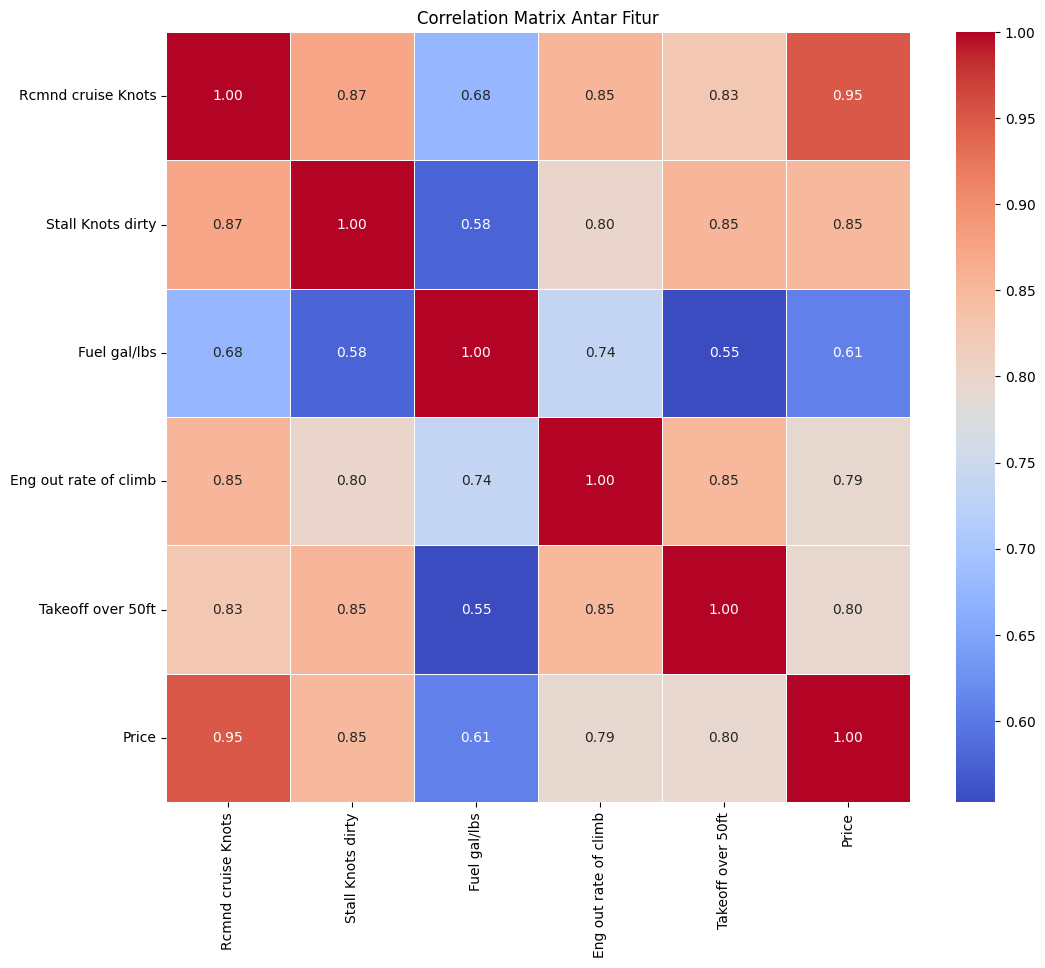

In [ ]:
# Hitung Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)
# Parameter numeric_only=True memastikan hanya kolom numerik yang dihitung korelasinya

# Visualisasi Correlation Matrix menggunakan Heatmap
plt.figure(figsize=(12, 10))  # Atur ukuran plot agar lebih mudah dibaca
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix Antar Fitur')
plt.show()

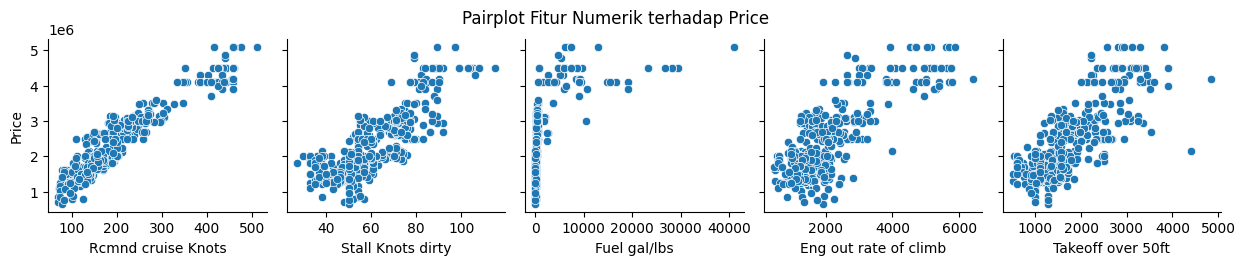

In [ ]:
# Visualisasi dengan pairplot untuk semua fitur sekaligus dengan Price
# Dapatkan list semua kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Buat list fitur numerik selain 'Price' untuk x_vars
numeric_features_no_price = [col for col in numeric_cols if col != 'Price']

# Buat pairplot dengan 'Price' sebagai y_vars dan fitur numerik lainnya sebagai x_vars
sns.pairplot(df, y_vars=['Price'], x_vars=numeric_features_no_price)
plt.suptitle('Pairplot Fitur Numerik terhadap Price', y=1.02)
plt.show()

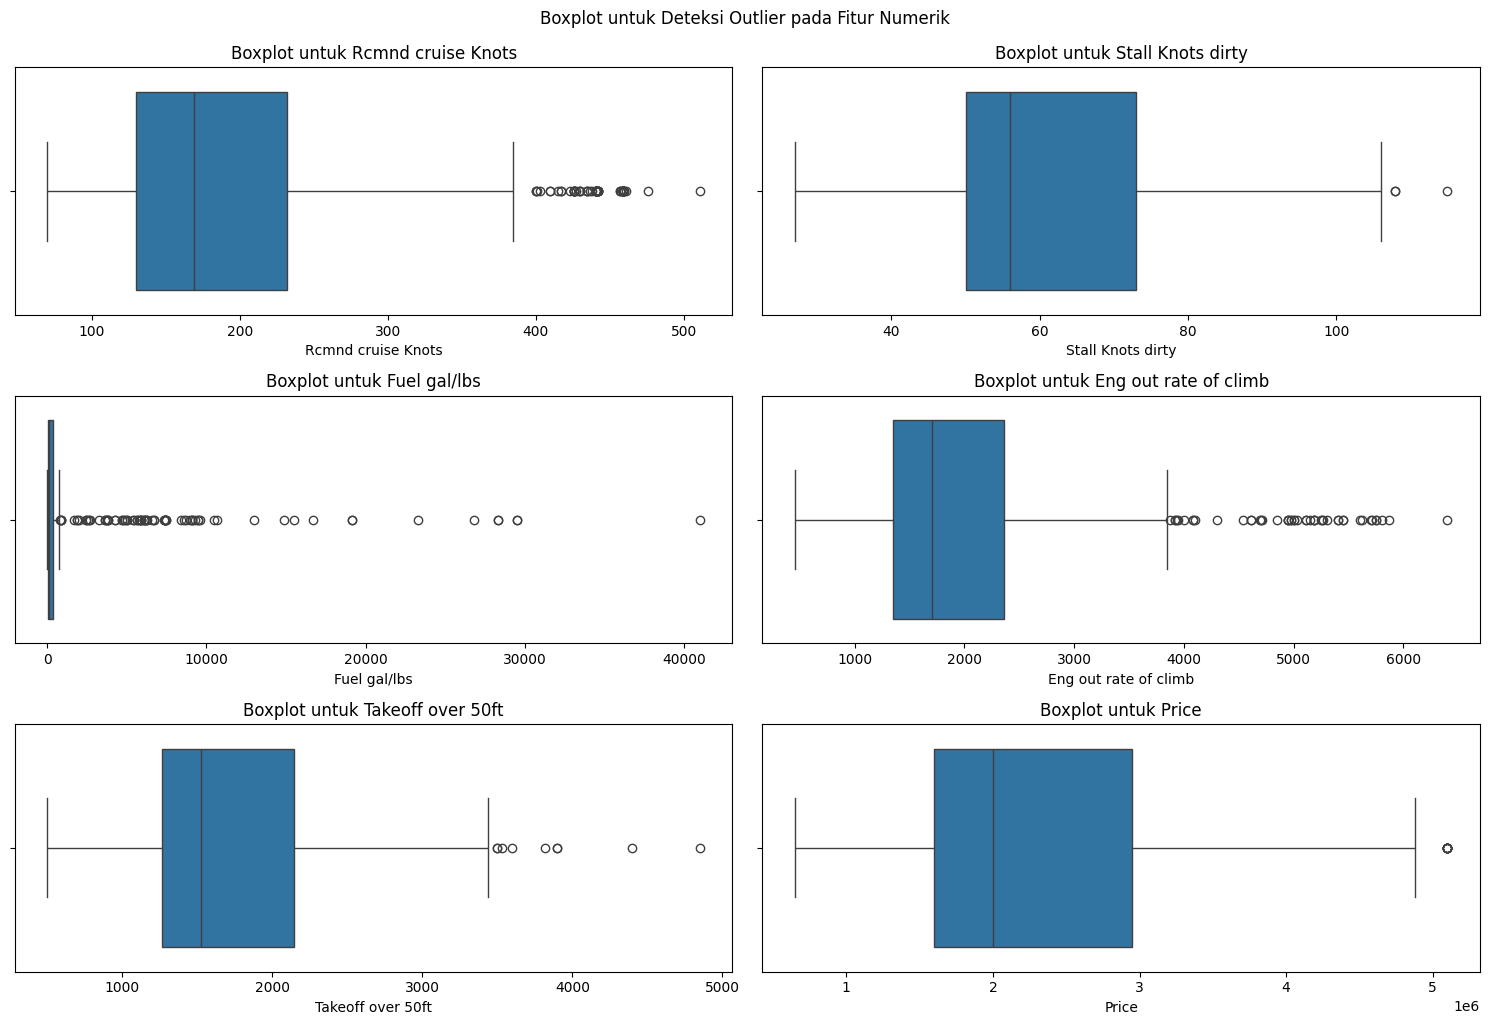

In [ ]:
# Buat boxplot untuk setiap kolom numerik untuk mendeteksi outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, len(numeric_cols) // 3 + (1 if len(numeric_cols) % 3 > 0 else 0), i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot untuk {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.suptitle('Boxplot untuk Deteksi Outlier pada Fitur Numerik', y=1.02)
plt.show()

In [ ]:
# Outlier
# Menentukan quartile dan interquartile
q1 = df[numeric_cols].quantile(0.25)
q3 = df[numeric_cols].quantile(0.75)
IQR = q3 - q1
# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Menampilkan jumlah outlier per fitur
outliers = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).sum()
print(outliers)

Rcmnd cruise Knots       59
Stall Knots dirty         3
Fuel gal/lbs             80
Eng out rate of climb    48
Takeoff over 50ft         9
Price                     9
dtype: int64


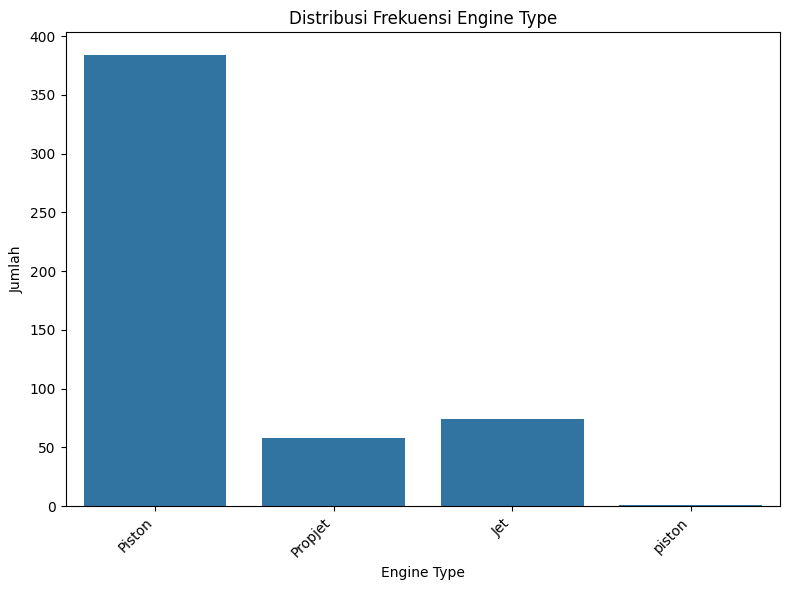

In [ ]:
# Visualisasi fitur kategorik; Engine Type
plt.figure(figsize=(8, 6))
sns.countplot(x=df['Engine Type'])
plt.title('Distribusi Frekuensi Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Data Preparation/Preprocessing

Data preparation/preprocessing dilakukan pada dataset untuk membersihkan, mengubah, dan mentransformasi data mentah menjadi format yang sesuai dan berkualitas tinggi agar dapat digunakan secara efektif oleh model machine learning.

Hilangkan feature model name, karena kurang relevan untuk price prediction

In [ ]:
pred_columns = [col for col in df.columns if col != 'Model Name']
df = df[pred_columns]

In [ ]:
# Memeriksa apakah kolom "Model Name" sudah tidak ada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Engine Type              517 non-null    object 
 1   HP or lbs thr ea engine  517 non-null    object 
 2   Max speed Knots          497 non-null    object 
 3   Rcmnd cruise Knots       507 non-null    float64
 4   Stall Knots dirty        502 non-null    float64
 5   Fuel gal/lbs             517 non-null    int64  
 6   All eng rate of climb    513 non-null    object 
 7   Eng out rate of climb    491 non-null    float64
 8   Takeoff over 50ft        492 non-null    float64
 9   Landing over 50ft        517 non-null    object 
 10  Empty weight lbs         516 non-null    object 
 11  Length ft/in             517 non-null    object 
 12  Wing span ft/in          517 non-null    object 
 13  Range N.M.               499 non-null    object 
 14  Price                    5

In [ ]:
# Ubah tipe data ke numeric karena ada beberapa fitur yang masih object
numeric_cols = ['HP or lbs thr ea engine', 'Max speed Knots', 'All eng rate of climb', 'Landing over 50ft', 'Empty weight lbs', 'Range N.M.']
# Hilangkan koma dan ubah tipe data menjadi float
for col in numeric_cols:
    # Menghilangkan koma dan spasi lalu ubah ke float
    df[col] = df[col].str.replace(',', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

<ipython-input-20-1a74b56b9e05>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(',', '', regex=True)
<ipython-input-20-1a74b56b9e05>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
# Ubah feature dengan ft/in menjadi numeric
# Fungsi untuk mengonversi panjang dari format ft/in ke inci
def ft_in_to_inches(length):
    try:
        ft, inch = length.split('/')
        ft = int(ft)
        inch = int(inch)
        return ft * 12 + inch
    except:
        return np.nan

# Mengonversi dan memastikan tipe data numeric
df['Length ft/in'] = df['Length ft/in'].apply(ft_in_to_inches)
df['Length ft/in'] = pd.to_numeric(df['Length ft/in'], errors='coerce')

df['Wing span ft/in'] = df['Wing span ft/in'].apply(ft_in_to_inches)
df['Wing span ft/in'] = pd.to_numeric(df['Wing span ft/in'], errors='coerce')

# Mengisi nilai NaN dengan median (jika ada)
df['Length ft/in'] = df['Length ft/in'].fillna(df['Length ft/in'].median())
df['Wing span ft/in'] = df['Wing span ft/in'].fillna(df['Wing span ft/in'].median())

# Verifikasi tipe data
print(df[['Length ft/in', 'Wing span ft/in']].dtypes)


Length ft/in       float64
Wing span ft/in    float64
dtype: object


<ipython-input-21-57f3c10b4f74>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length ft/in'] = df['Length ft/in'].apply(ft_in_to_inches)
<ipython-input-21-57f3c10b4f74>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length ft/in'] = pd.to_numeric(df['Length ft/in'], errors='coerce')
<ipython-input-21-57f3c10b4f74>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
# Ganti "piston" menjadi "Piston"
df['Engine Type'] = df['Engine Type'].str.replace('piston', 'Piston').astype(str)

In [ ]:
# Periksa apakah piston sudah tidak ada
print((df['Engine Type'] == "piston").sum())

0


#### Mengatasi nilai null/missing values

Karena nilai null cukup banyak, agar menghindari kehilangan cukup banyak data juga, maka diisi dengan menggunakan nilai median atau modus

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [ ]:
# Periksa ulang jumlah missing value
df.isna().sum()

,0
Engine Type,0
HP or lbs thr ea engine,0
Max speed Knots,0
Rcmnd cruise Knots,0
Stall Knots dirty,0
Fuel gal/lbs,0
All eng rate of climb,0
Eng out rate of climb,0
Takeoff over 50ft,0
Landing over 50ft,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Engine Type              517 non-null    object 
 1   HP or lbs thr ea engine  517 non-null    float64
 2   Max speed Knots          517 non-null    float64
 3   Rcmnd cruise Knots       517 non-null    float64
 4   Stall Knots dirty        517 non-null    float64
 5   Fuel gal/lbs             517 non-null    int64  
 6   All eng rate of climb    517 non-null    float64
 7   Eng out rate of climb    517 non-null    float64
 8   Takeoff over 50ft        517 non-null    float64
 9   Landing over 50ft        517 non-null    float64
 10  Empty weight lbs         517 non-null    float64
 11  Length ft/in             517 non-null    float64
 12  Wing span ft/in          517 non-null    float64
 13  Range N.M.               517 non-null    float64
 14  Price                    5

#### Mengatasi outlier

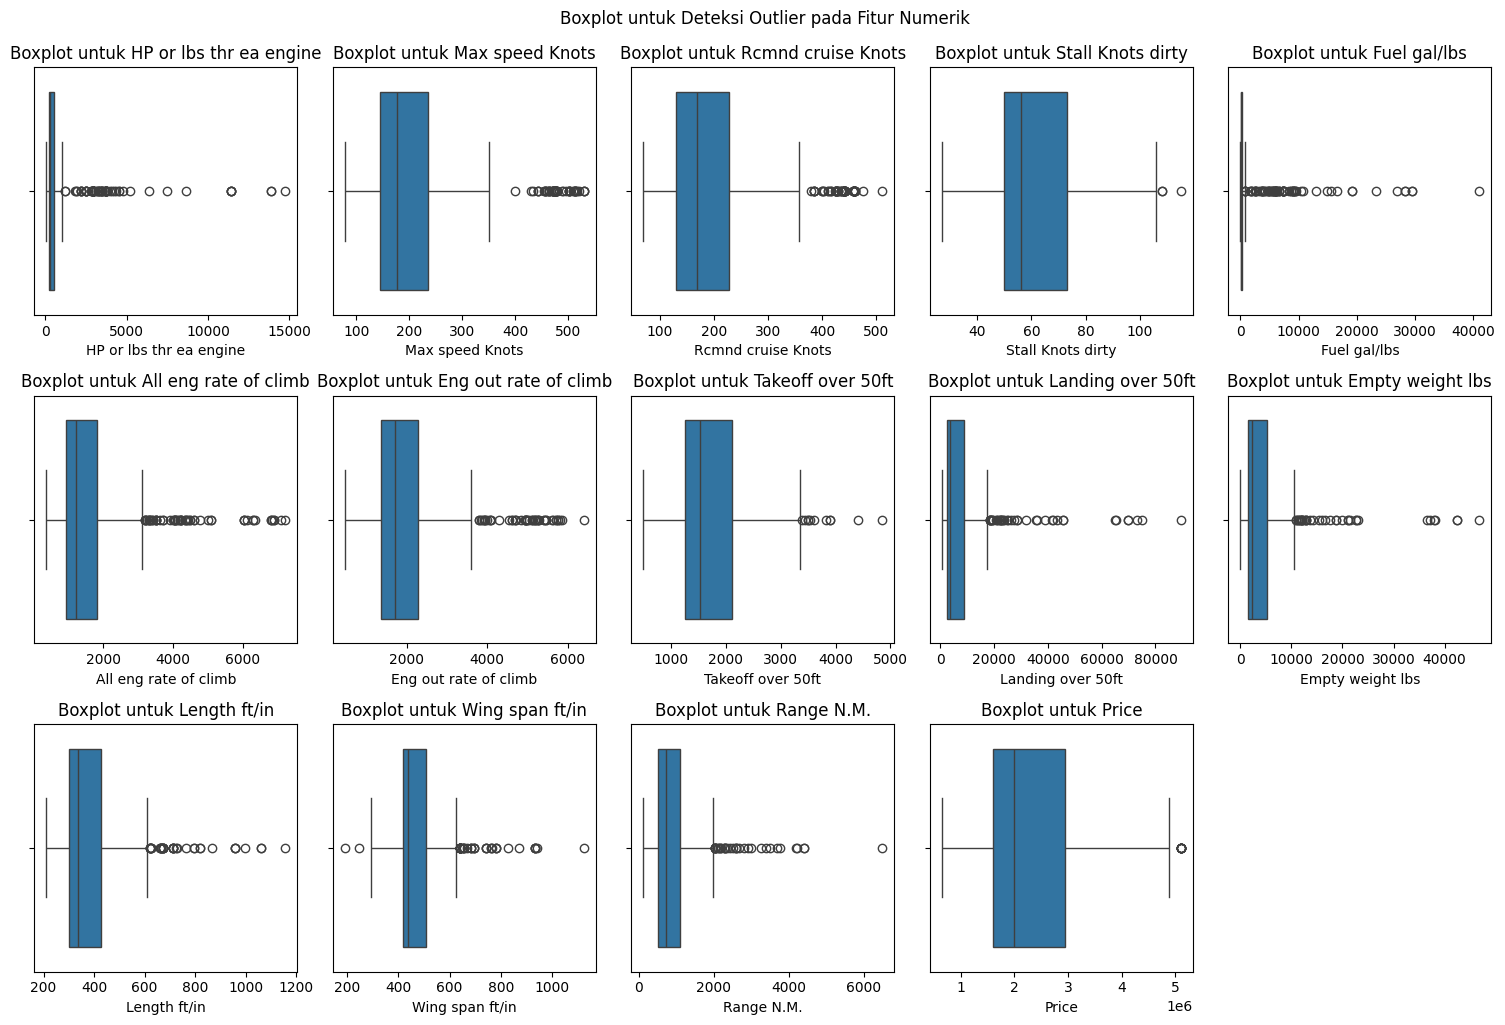

In [ ]:
# Buat boxplot untuk setiap kolom numerik untuk mendeteksi outlier manakah yang sebaiknya diatasi
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, len(numeric_cols) // 3 + (1 if len(numeric_cols) % 3 > 0 else 0), i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot untuk {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.suptitle('Boxplot untuk Deteksi Outlier pada Fitur Numerik', y=1.02)
plt.show()

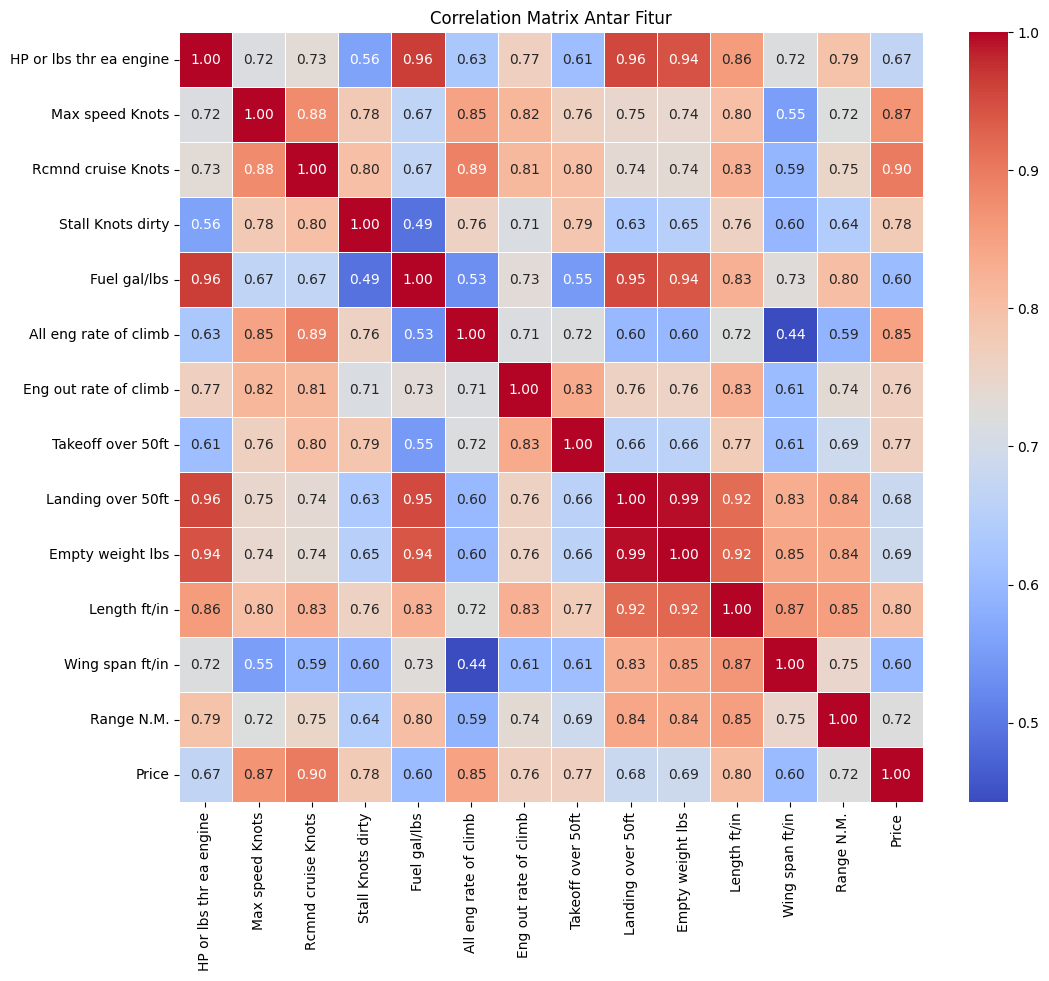

In [ ]:
# Hitung Correlation Matrix untuk mengetahui mendeteksi outlier manakah yang sebaiknya diatasi
correlation_matrix = df.corr(numeric_only=True)
# Parameter numeric_only=True memastikan hanya kolom numerik yang dihitung korelasinya

# Visualisasi Correlation Matrix menggunakan Heatmap
plt.figure(figsize=(12, 10))  # Atur ukuran plot agar lebih mudah dibaca
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix Antar Fitur')
plt.show()

Berdasarkan visualisasi tersebut, variabel yang sebaiknya ditangani outliernya untuk predictive analysis Price adalah `Price`, `Max speed knots`, `Rcmnd cruise Knots`, `Length ft/in`, dan `All eng rate of climb`

In [ ]:
outlier_cols = ['Price', 'Max speed Knots', 'Rcmnd cruise Knots', 'Length ft/in', 'All eng rate of climb']
# Menentukan quartile dan IQR
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengatasi outlier dengan metode capping
for col in outlier_cols:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

In [ ]:
# Cek, bandingkan outlier
# Menentukan quartile dan interquartile
q1 = df[numeric_cols].quantile(0.25)
q3 = df[numeric_cols].quantile(0.75)
IQR = q3 - q1
# Menentukan batas bawah dan atas untuk mendeteksi outlier
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Menampilkan jumlah outlier per fitur
outliers = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).sum()
print(outliers)

HP or lbs thr ea engine    75
Max speed Knots             0
Rcmnd cruise Knots          0
Stall Knots dirty           3
Fuel gal/lbs               80
All eng rate of climb       0
Eng out rate of climb      51
Takeoff over 50ft          11
Landing over 50ft          40
Empty weight lbs           37
Length ft/in                0
Wing span ft/in            42
Range N.M.                 35
Price                       0
dtype: int64


#### Encoding Fitur Kategorik

In [ ]:
distinct_engine = df["Engine Type"].unique()
print(distinct_engine)

['Piston' 'Propjet' 'Jet']


In [ ]:
# One Hot Encoding untuk fitur 'Engine type'
engine_dummies = pd.get_dummies(df['Engine Type'], prefix='Engine', drop_first=True)

# Menggabungkan hasil encoding dengan dataset
df = pd.concat([df, engine_dummies], axis=1)

# Drop kolom asli jika tidak diperlukan lagi
df.drop('Engine Type', axis=1, inplace=True)

# Verifikasi hasil
print(df.head())

   HP or lbs thr ea engine  Max speed Knots  Rcmnd cruise Knots  \
0                    145.0            104.0                91.0   
1                     85.0             89.0                83.0   
2                     90.0             90.0                78.0   
3                     85.0             88.0                78.0   
4                     65.0             83.0                74.0   

   Stall Knots dirty  Fuel gal/lbs  All eng rate of climb  \
0               46.0            36                  450.0   
1               44.0            15                  600.0   
2               37.0            19                  650.0   
3               37.0            19                  620.0   
4               33.0            14                  370.0   

   Eng out rate of climb  Takeoff over 50ft  Landing over 50ft  \
0                  900.0             1300.0             2050.0   
1                  720.0              800.0             1350.0   
2                  475.0        

#### Feature selection (karena terdapat fitur yang multikolinear)

In [ ]:
# Memisahkan fitur dan target
X = df.drop(columns=['Price'])
y = df['Price']

In [ ]:
# Feature selection
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X = X[selected_features]  # simpan fitur terbaik saja

#### Splitting Data

In [ ]:
# Numeric_cols tanpa price
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
) # Data test 20%

#### Standarisasi hanya fitur numerik

In [ ]:
# Hitung mean dan standar deviasi
print("Mean per kolom:")
print(df[numeric_cols].mean())

print("\nStandar Deviasi per kolom:")
print(df[numeric_cols].std())

# Hitung nilai minimum dan maksimum
print("\nMinimum per kolom:")
print(df[numeric_cols].min())

print("\nMaksimum per kolom:")
print(df[numeric_cols].max())

Mean per kolom:
Max speed Knots           200.117988
Rcmnd cruise Knots        192.767892
Stall Knots dirty          60.656673
All eng rate of climb    1496.874275
Eng out rate of climb    2047.065764
Takeoff over 50ft        1732.750484
Empty weight lbs         4377.405803
Length ft/in              376.611219
Range N.M.                911.448743
dtype: float64

Standar Deviasi per kolom:
Max speed Knots            79.782958
Rcmnd cruise Knots         86.585265
Stall Knots dirty          16.432874
All eng rate of climb     817.422311
Eng out rate of climb    1123.433947
Takeoff over 50ft         713.646967
Empty weight lbs         5649.738675
Length ft/in              108.572528
Range N.M.                696.429643
dtype: float64

Minimum per kolom:
Max speed Knots           78.0
Rcmnd cruise Knots        70.0
Stall Knots dirty         27.0
All eng rate of climb    360.0
Eng out rate of climb    457.0
Takeoff over 50ft        500.0
Empty weight lbs           2.3
Length ft/in           

In [ ]:
# Inisialisasi RobustScaler
scaler = RobustScaler()

# Fit dan transformasi data hanya pada kolom numerik
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])  # Menggunakan transform saja, supaya tidak ada leak dari data uji

In [ ]:
X_train.head()

,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Empty weight lbs,Length ft/in,Range N.M.,Engine_Piston
329,-0.592391,-0.451923,-0.347826,-0.536082,-0.016129,-0.224852,-0.188633,-0.112,-0.406143,True
173,2.119565,1.990385,1.434783,2.024742,1.243952,1.508876,1.090152,1.448,0.489761,False
272,-0.288043,-0.259615,-0.130435,-0.288660,0.104839,-0.218935,-0.111465,-0.032,-0.269625,True
497,-0.070652,-0.057692,-0.260870,-0.092784,-0.409274,-0.189349,-0.165360,-0.472,-0.191126,True
182,0.000000,1.990385,1.304348,2.024742,1.909274,1.958580,1.635228,1.832,2.025597,False


### Pemodelan regresi

Pemodelan regresi yang dilakukan ke dataset yang sudah di-preprocess tujuannya adalah untuk memprediksi nilai keluaran yang kontinu atau numerik berdasarkan satu atau lebih variabel input (fitur).

In [ ]:
# Inisialisasi model
lr_model = LinearRegression()

# Latih model
lr_model.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Definisi parameter grid yang ingin dicoba
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisialisasi model
rfr = RandomForestRegressor(random_state=42)

# Grid Search (Hyperparameter Tuning)
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Latih model
grid_search.fit(X_train, y_train)

# Model terbaik dari Grid Search
best_rfr_model = grid_search.best_estimator_

# Prediksi
y_pred_rfr = best_rfr_model.predict(X_test)


### Evaluasi Model

Evaluasi model yang dilakukan bertujuan untuk mengukur seberapa baik kinerja model Anda dalam membuat prediksi atau keputusan yang akurat dan relevan pada data baru yang belum pernah dilihat sebelumnya.

In [ ]:
# Evaluasi Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("=== Evaluasi Model: Linear Regression ===")
print(f"MAE  : {mae_lr:.2f}")
print(f"RMSE : {rmse_lr:.2f}")
print(f"R2   : {r2_lr:.4f}")

=== Evaluasi Model: Linear Regression ===
MAE  : 314165.48
RMSE : 427787.68
R2   : 0.8203


In [ ]:
# Evaluasi
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2_rfr = r2_score(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)

print("=== Evaluasi Model: Random Forest Regressor ===")
print("Best Parameters:", grid_search.best_params_)
print(f"MAE  : {mae_rfr:.2f}")
print(f"RMSE : {rmse_rfr:.2f}")
print(f"MSE  : {mse_rfr:.2f}")
print(f"R2   : {r2_rfr:.4f}")

=== Evaluasi Model: Random Forest Regressor ===
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
MAE  : 243975.85
RMSE : 352628.35
MSE  : 124346754347.05
R2   : 0.8779


### Kesimpulan

Berdasarkan hasil evaluasi dua model regresi yang digunakan, yaitu Linear Regression dan Random Forest Regressor, diperoleh bahwa model Random Forest memiliki performa prediktif yang lebih baik dibandingkan Linear Regression. Linear Regression menghasilkan nilai R² sebesar 0,820, MAE sebesar 314.165,48, dan RMSE sebesar 427.787,68. Meskipun cukup baik, model ini cenderung kurang mampu menangkap hubungan non-linear dalam data.

Sementara itu, hasil optimisasi hyperparameter menggunakan GridSearchCV pada model Random Forest Regressor menghasilkan kombinasi parameter terbaik yaitu: n_estimators=300, max_depth=None, min_samples_split=2, dan min_samples_leaf=1. Dengan konfigurasi ini, model menghasilkan R² sebesar 0,878, MAE sebesar 243.975,85, dan RMSE sebesar 352.628,35. Ini menunjukkan bahwa model dapat menjelaskan sekitar 87,8% variasi pada data target, dengan rata-rata kesalahan prediksi sekitar 352 ribu dollar terhadap harga pesawat yang berada dalam skala jutaan dollar. Nilai MSE yang besar (124.346.754.347,05) dapat dimaklumi mengingat skala harga yang besar pula.

Secara keseluruhan, Random Forest Regressor terbukti lebih unggul dibandingkan Linear Regression dalam memprediksi harga pesawat pada dataset ini. Hal ini dikarenakan kemampuannya dalam menangani hubungan kompleks antar fitur, serta fleksibilitas dalam membentuk struktur pohon keputusan yang optimal.

